# The Bermuda Triangle

## ipywidgets

Here are the import statements for the interactive widgets:

In [1]:
from ipywidgets import interact, IntSlider, FloatSlider

## matplotlib

Here's the code that plots the triangle, which you'll use in the following examples:

In [2]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")

def draw(
    vertices,
    xlim=(-90, 20),
    ylim=(-20, 50),
    fill="cornflowerblue",
    stroke="royalblue",
    letters=False,
):
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.gca().set_aspect("equal", adjustable="box")
    x = [vertex.real for vertex in vertices]
    y = [vertex.imag for vertex in vertices]
    plt.plot(x, y, "o", color=stroke)
    plt.gca().add_patch(
        plt.Polygon(
            list(zip(x, y)),
            facecolor=fill,
            edgecolor=stroke,
            alpha=0.5,
            lw=2,
        )
    )
    if letters:
        for i, vertex in enumerate(vertices):
            plt.text(
                vertex.real + 1,
                vertex.imag + 1,
                chr(65 + i),
                color=stroke,
                fontsize=16,
            )
    plt.tight_layout()

## Complex Numbers

Define the region with **complex numbers**, whose real part represents the **longitude**, while the imaginary part represents the **latitude** of a city. Ignore the curvature of Earth, assuming the coordinates were already projected from spherical to rectangular:

In [3]:
miami_fl = complex(-80.191788, 25.761681)
san_juan = complex(-66.105721, 18.466333)
hamilton = complex(-64.78303, 32.2949)

Now, you can draw your triangle:

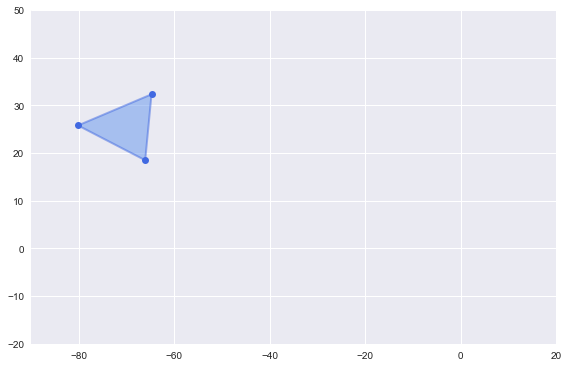

In [4]:
triangle = miami_fl, san_juan, hamilton
draw(triangle)

## Translation

Align the **geometric center** of the triangle with the coordinate system's origin by applying an appropriate **translation**:

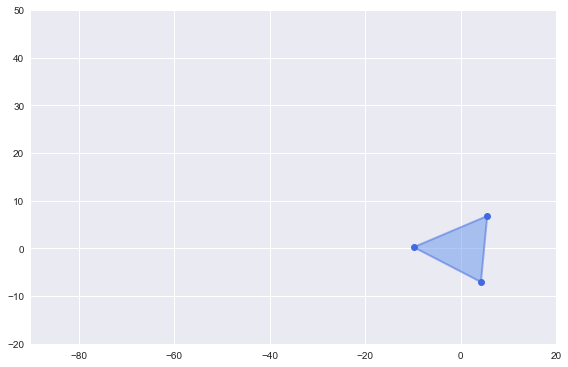

In [5]:
geometric_center = sum(triangle) / 3
centered_triangle = [vertex - geometric_center for vertex in triangle]
draw(centered_triangle)

This triangle looks the same as before, but the coordinates of its vertices have shifted.

You can play around with a custom translation below:

In [6]:
@interact(xoffset=IntSlider(min=-20, max=20, value=0, step=1), yoffset=IntSlider(min=-20, max=20, value=0, step=1))
def translate(xoffset, yoffset):
    offset = complex(xoffset, yoffset)
    scaled_triangle = [vertex + offset for vertex in centered_triangle]
    draw(scaled_triangle)

interactive(children=(IntSlider(value=0, description='xoffset', max=20, min=-20), IntSlider(value=0, descripti…

## Flipping

To flip a complex number around an axis, take the **negative** of the relevant component or calculate the **complex conjugate** for the vertical symmetry:

In [7]:
def flip_horizontally(z: complex) -> complex:
    return complex(-z.real, z.imag)

def flip_vertically(z: complex) -> complex:
    return z.conjugate()  # Alternatively: complex(z.real, -z.imag)

@interact(horizontally=False, vertically=False)
def flip(horizontally, vertically):
    flipped_triangle = centered_triangle
    if horizontally:
        flipped_triangle = [flip_horizontally(vertex) for vertex in flipped_triangle]
    if vertically:
        flipped_triangle = [flip_vertically(vertex) for vertex in flipped_triangle]
    lim = (-20, 20)
    draw(flipped_triangle, xlim=lim, ylim=lim, letters=True)

interactive(children=(Checkbox(value=False, description='horizontally'), Checkbox(value=False, description='ve…

## Scaling

Multiply every vertex by a **real number** to stretch the triangle:

In [8]:
@interact(size=FloatSlider(min=0.5, max=5, value=1, step=0.5))
def scale(size):
    scaled_triangle = [size * vertex for vertex in centered_triangle]
    draw(scaled_triangle)

interactive(children=(FloatSlider(value=1.0, description='size', max=5.0, min=0.5, step=0.5), Output()), _dom_…

## Rotation

Multiplying the triangle by the **imaginary unit** (`1j`) once has the effect of rotating it 90° counterclockwise around the coordinate system's origin. If you continue doing that, you'll arrive where you began:

In [9]:
def rotate(z: complex, degrees: float) -> complex:
    return z * 1j**(degrees/90)

@interact(angle=IntSlider(min=0, max=360, value=90, step=1))
def show_rotate(angle):
    plt.gca().add_patch(plt.Circle((0, 0), 85, lw=1, edgecolor="silver", facecolor="None"))
    lim = (-100, 100)
    rotated_triangle = [rotate(vertex, angle) for vertex in triangle]
    draw(triangle, xlim=lim, ylim=lim, letters=True)
    draw(rotated_triangle, xlim=lim, ylim=lim, fill="firebrick", stroke="maroon", letters=True)

interactive(children=(IntSlider(value=90, description='angle', max=360), Output()), _dom_classes=('widget-inte…